In [1]:
%matplotlib inline
from marketdata import *
from model import *
from analytics import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from datetime import datetime

import pylab
sns.set(font_scale=3)
pylab.rcParams['figure.figsize'] = (24, 18)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


# Load data 

Try clean up markets with 100% close out values

In [6]:
def remove_inf(pnl):
    return pnl.replace(np.inf,0).replace(-np.inf,0)

In [2]:
list_of_markets=get_market_list()

In [3]:
df=pd.DataFrame()
for m in list_of_markets:
    try:
        df[m]=get_timeseries(m)
    except:
        print m

RU
S


In [7]:
mkts=df.T[df.count().sort_values()!=0].index

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [49]:
mkts=['A', 'AG', 'AL', 'AU', 'B', 'BU', 'C', 'CF', 'CS', 'CU', 'ER', 'FB',
      'FG', 'GN', 'HC', 'I', 'J', 'JD', 'JM', 'L', 'M', 'MA', 'ME', 'NI', 'P',
      'PB', 'PP', 'RB', 'RM', 'RO', 'SN', 'SR', 'TA', 'V', 'WH', 'WS', 'WT',
      'Y','ZN']

In [50]:
pos=tsmom_daily(df[mkts],10)
pnl=calc_pnl_wc(pos,df[mkts])
scaling_factor=calc_scaling_factor(pnl)
portfolio= remove_inf(pnl).mean(axis=1).dropna()*scaling_factor

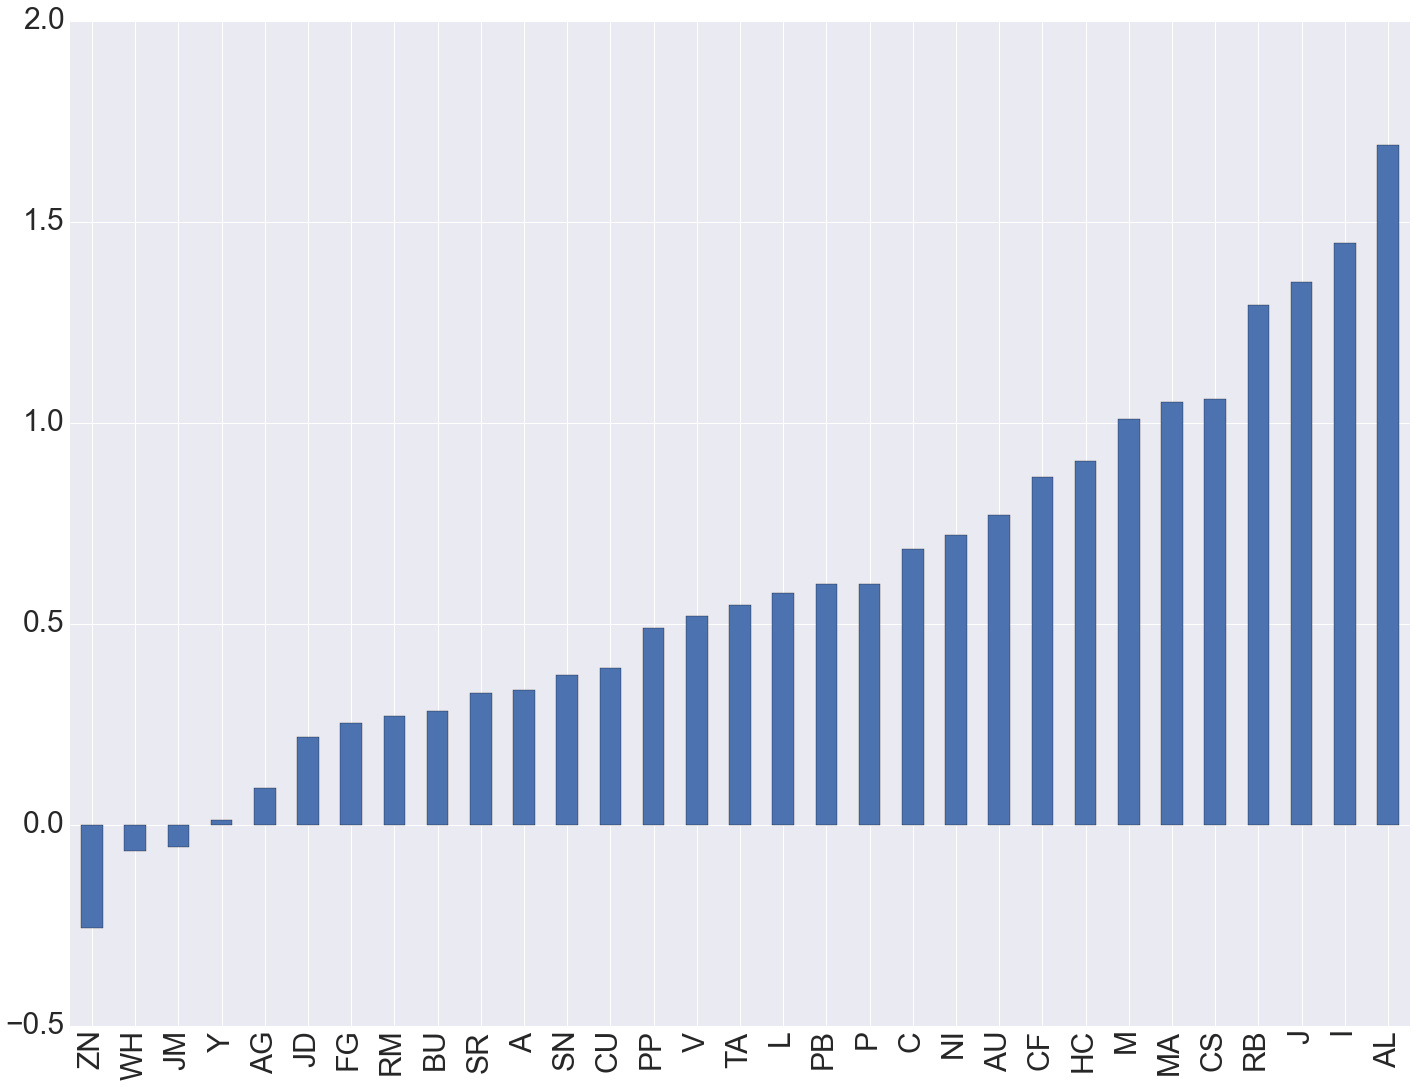

In [51]:
calc_Sharpe(pnl,250).dropna().sort_values().plot(kind='bar')

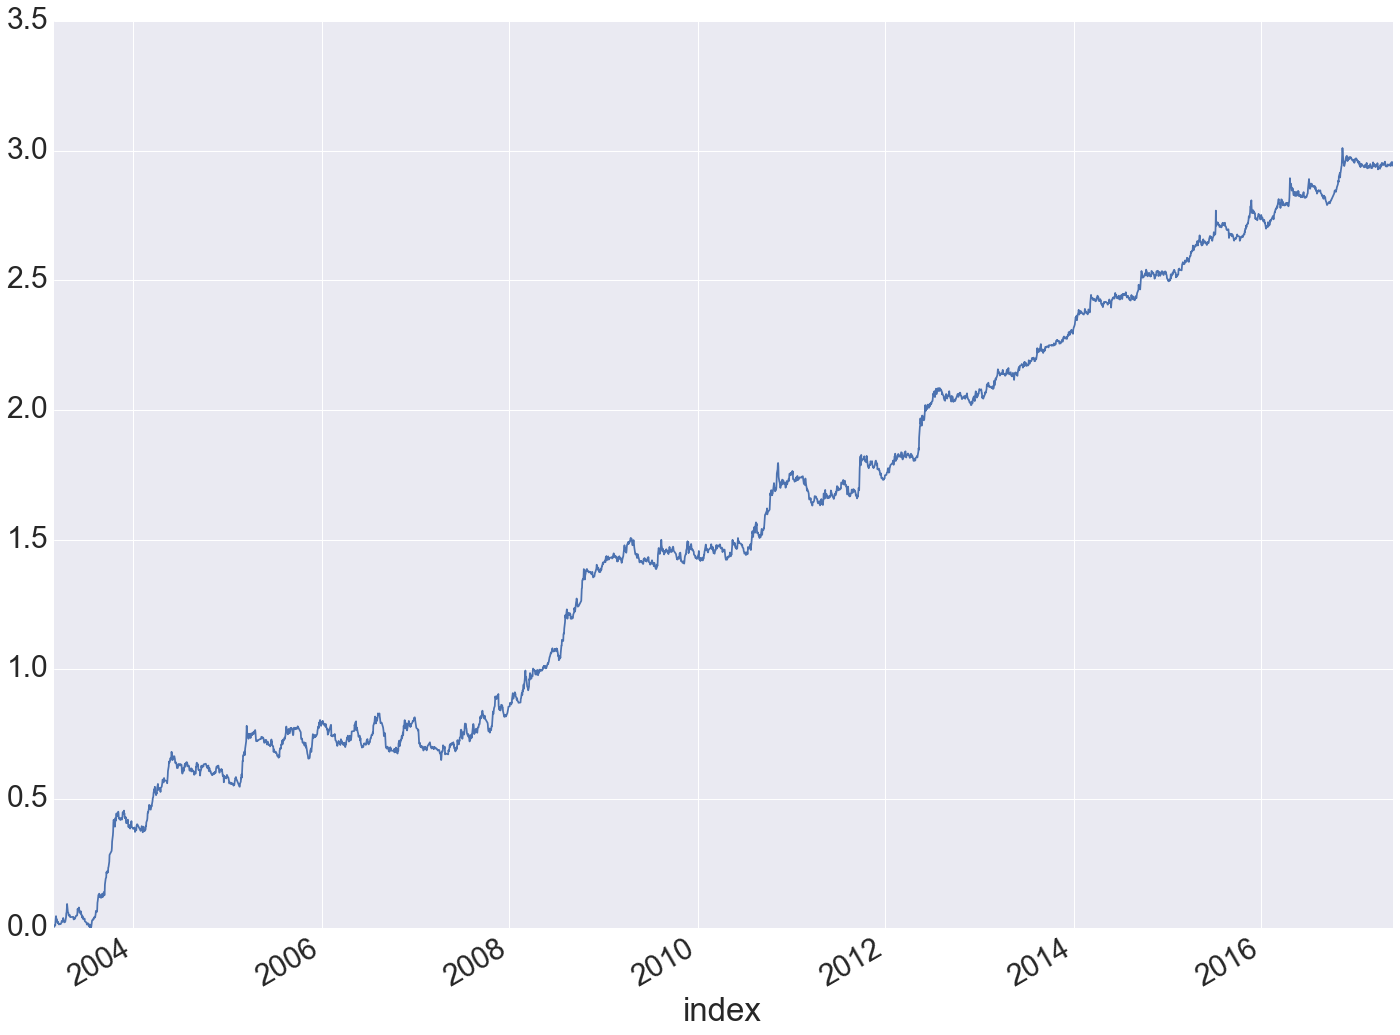

In [52]:
portfolio.cumsum().plot()

In [53]:
pnl_with_lookbacks=pd.DataFrame()
for l in range(5,250,5):
    pos=tsmom_daily(df[mkts],l)
    pnl=calc_pnl_wc(pos,df[mkts])
    scaling_factor=calc_scaling_factor(pnl)
    pnl_with_lookbacks[str(l)]= remove_inf(pnl).mean(axis=1).dropna()*scaling_factor

model.py:8: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=115,center=False).mean()
  signal=pd.rolling_mean(data,signal_lookback)
model.py:8: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=120,center=False).mean()
  signal=pd.rolling_mean(data,signal_lookback)
model.py:8: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=125,center=False).mean()
  signal=pd.rolling_mean(data,signal_lookback)
model.py:8: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=130,center=False).mean()
  signal=pd.rolling_mean(data,signal_lookback)
model.py:8: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future v

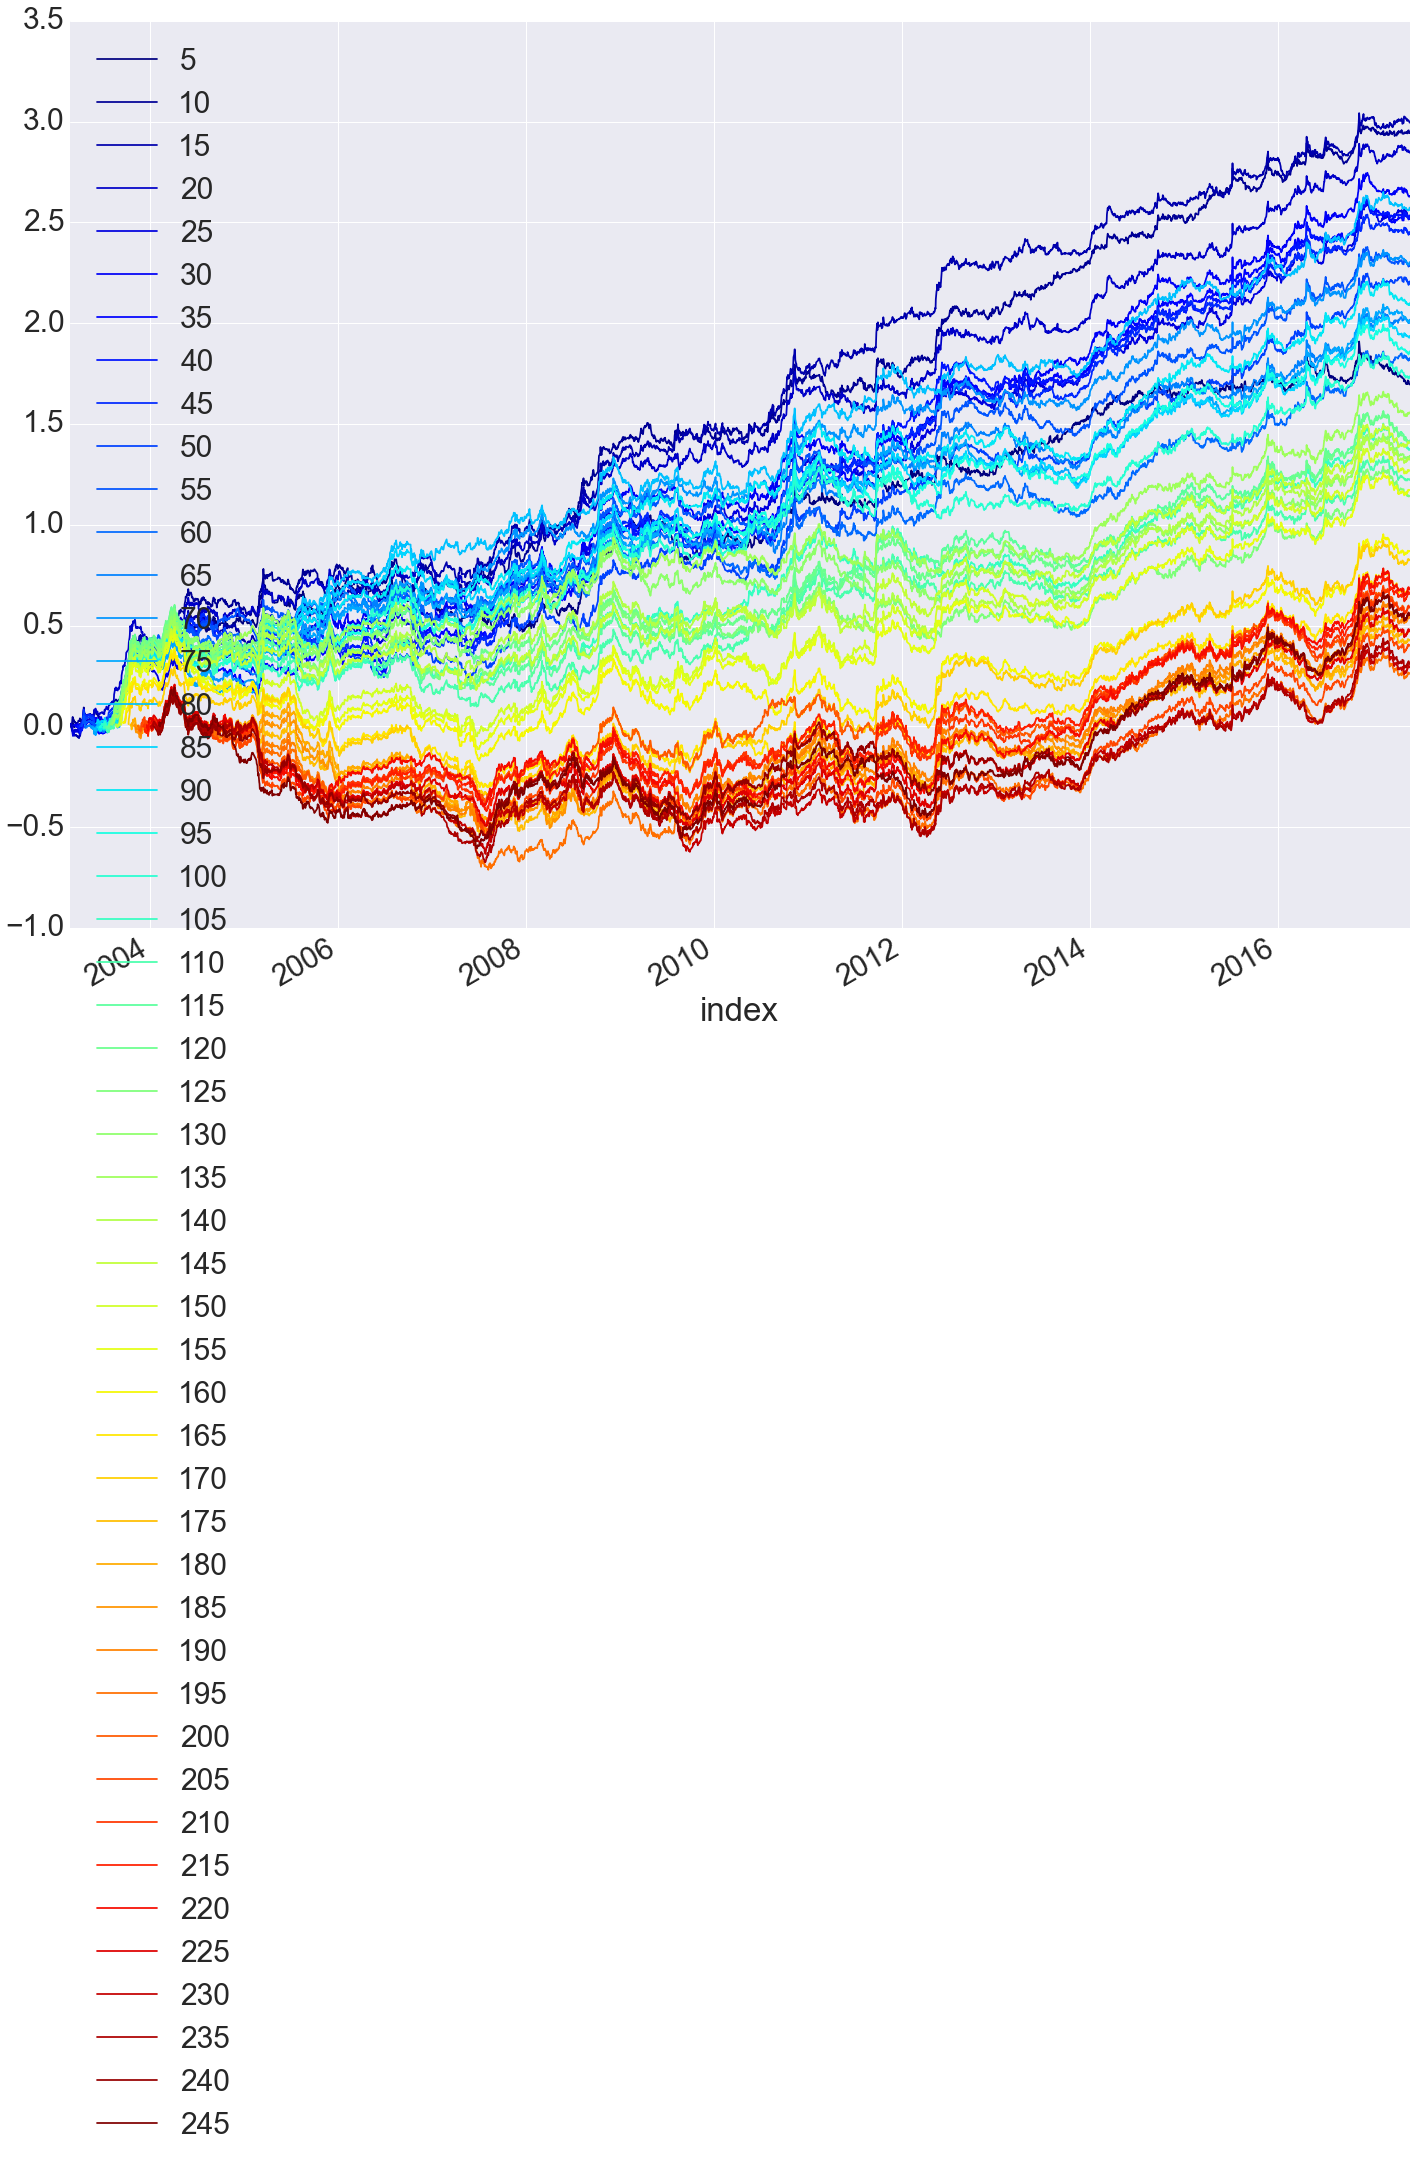

In [54]:
pnl_with_lookbacks.cumsum().plot(colormap='jet')

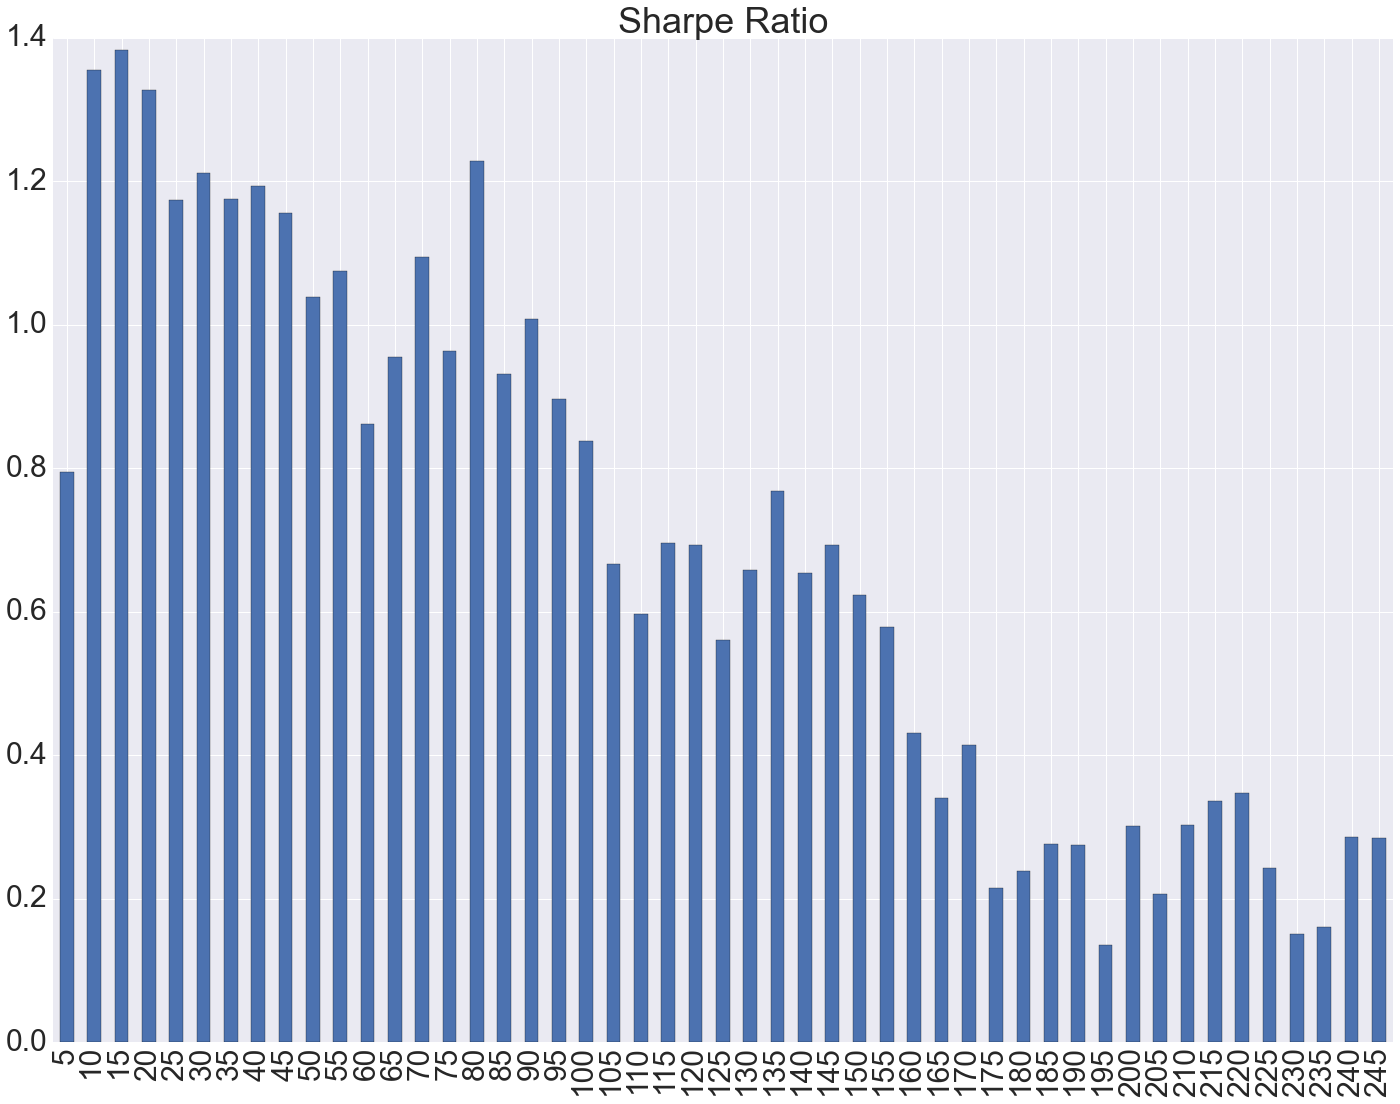

In [55]:
calc_Sharpe(pnl_with_lookbacks,250).plot(kind='bar',title='Sharpe Ratio')

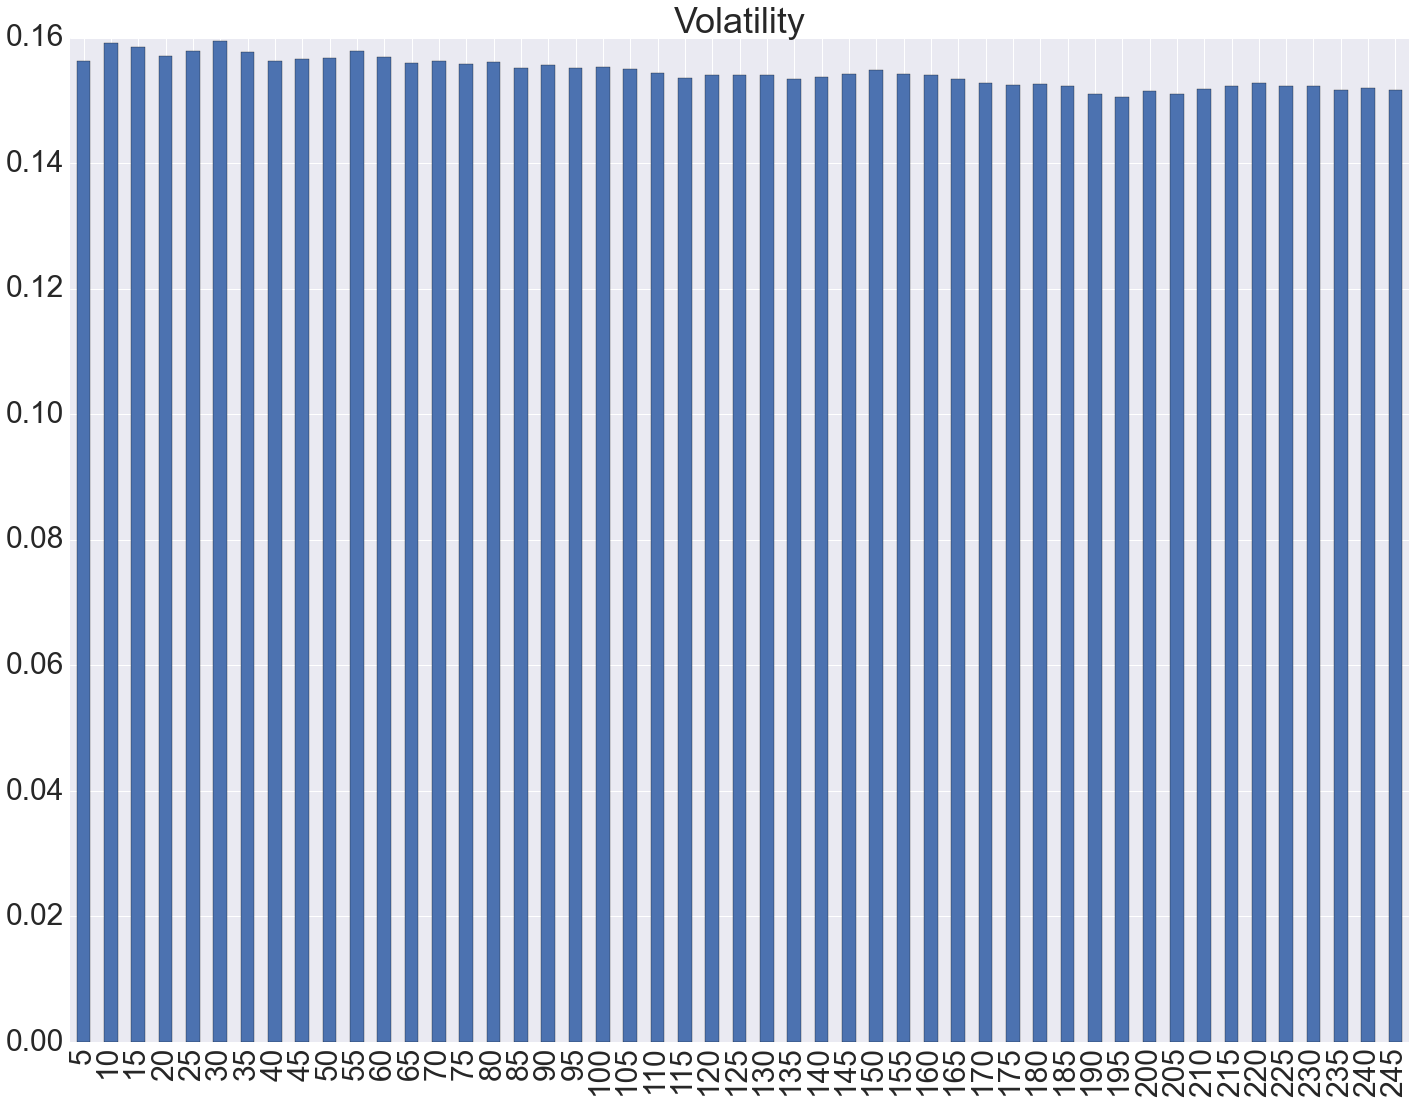

In [56]:
(pnl_with_lookbacks.std()*16).plot(kind='bar',title='Volatility')

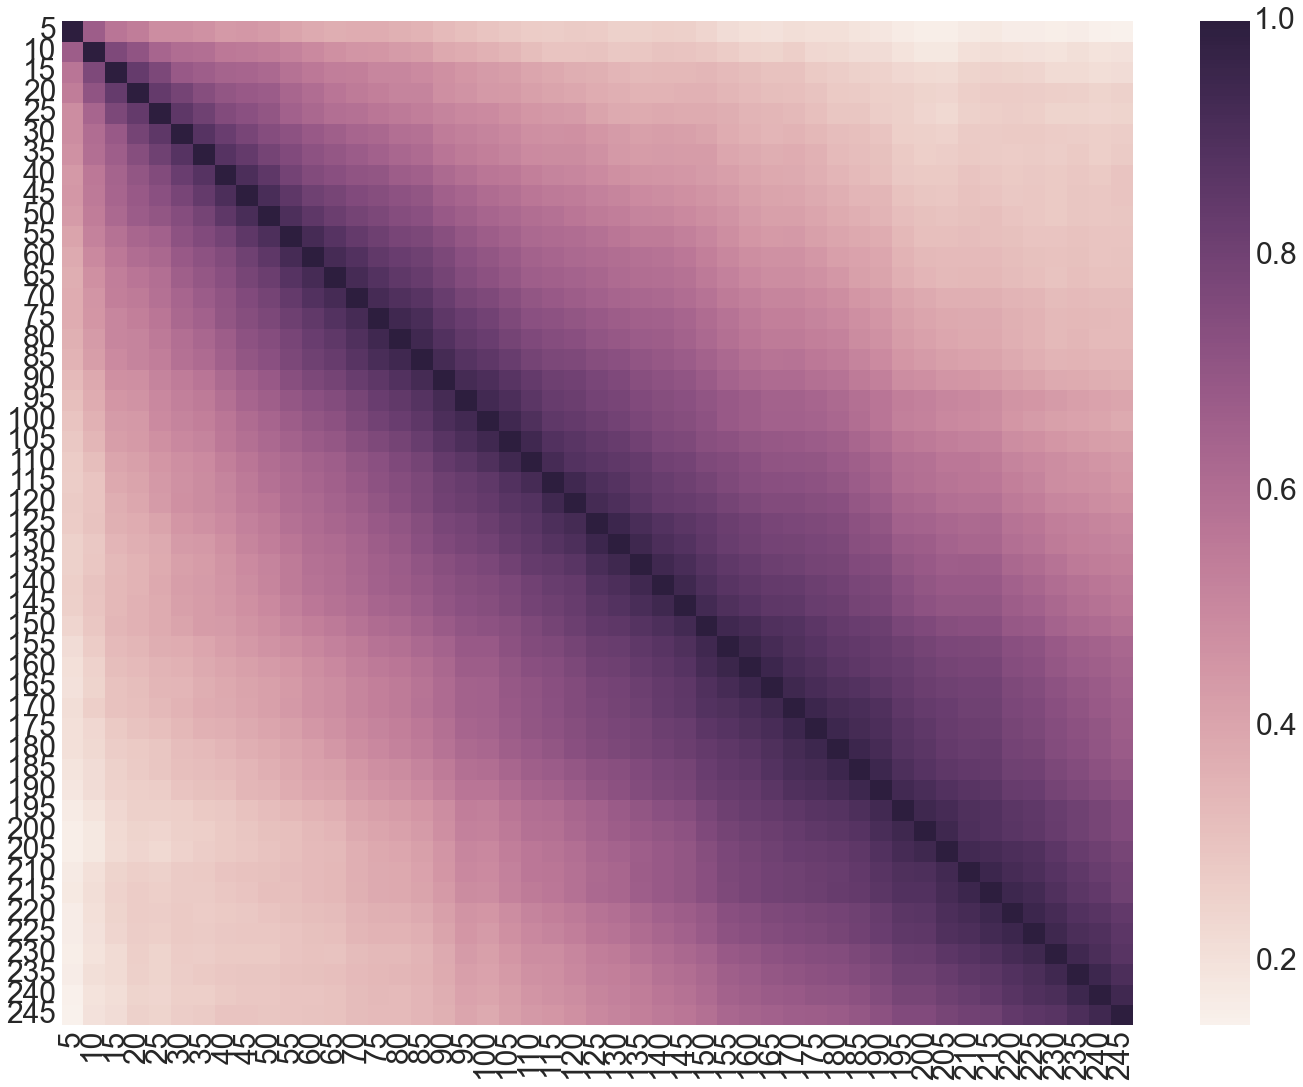

In [57]:
sns.heatmap(pnl_with_lookbacks.corr())

Drawdown analysis

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  if __name__ == '__main__':
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: FutureWarning: pd.rolling_max is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(min_periods=1,window=1000000,center=False).max()
  from IPython.kernel.zmq import kernelapp as app


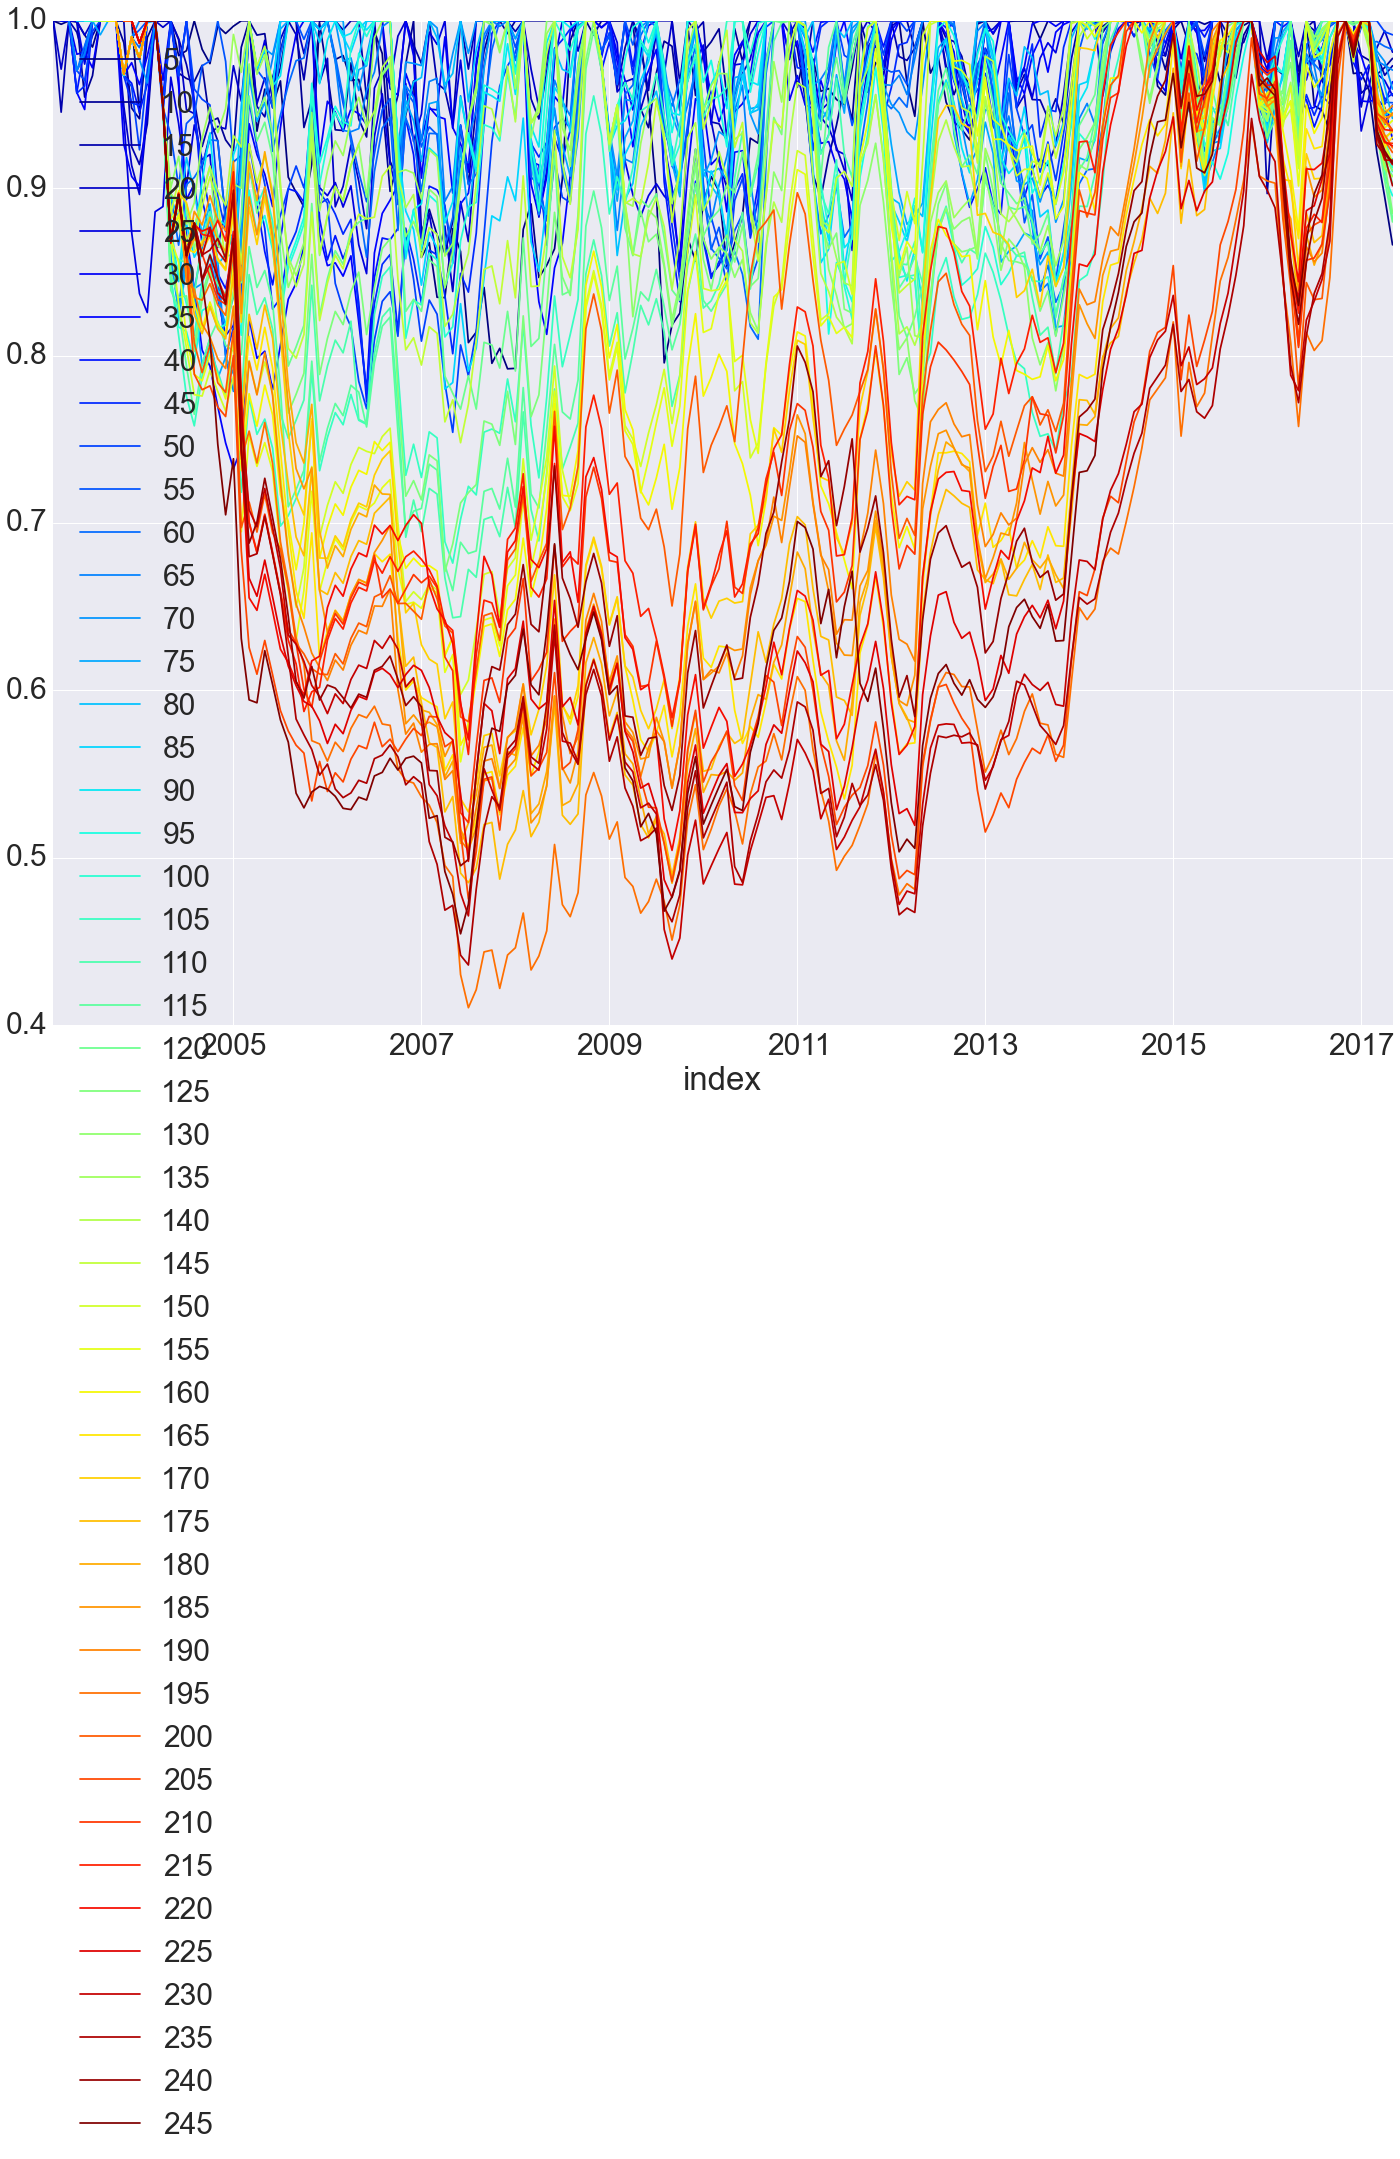

In [58]:
temp=(pnl_with_lookbacks.resample(rule='m',how='sum')+1).cumprod()
(temp/pd.rolling_max(temp,1000000,min_periods=1)).plot(colormap='jet')

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: pd.rolling_max is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(min_periods=1,window=1000000,center=False).max()
  if __name__ == '__main__':


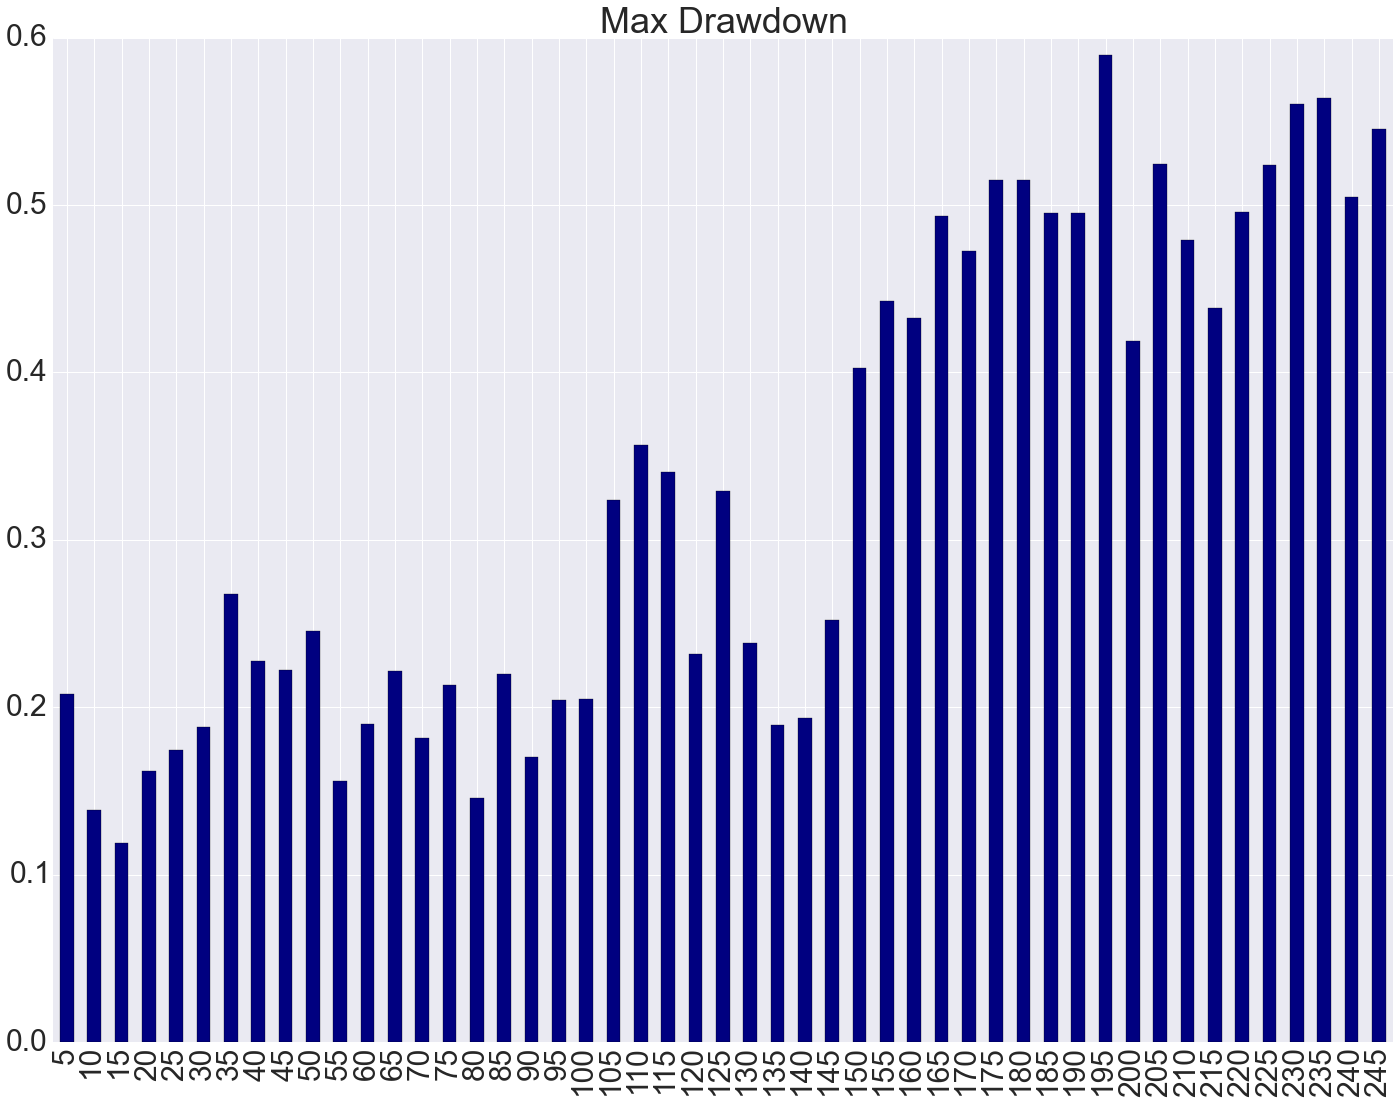

In [59]:
temp2=(1-(temp/pd.rolling_max(temp,1000000,min_periods=1)).min())
temp2.plot(kind='bar',colormap='jet',title='Max Drawdown')